## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.A typical lead conversion process can be represented using the following funnel:

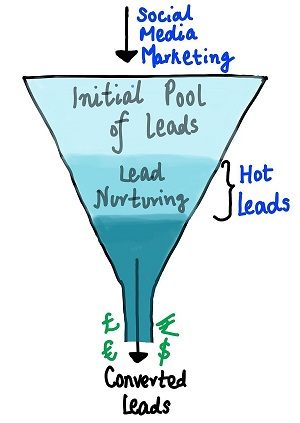
Lead Conversion Process - Demonstrated as a funnel

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



## Goals of the Case Study

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


## Will Follows these step to build multiple linear regression model
    Step 1- Import all Required packages
    Step 2- Data Loading / Understanding / Data Cleansing and Exploratory Data Analysis
    Step 3- Data Prepration for Modeling ( train-test split and rescaling )
    Step 4- Model Building
    Step 5- Model Evaluation
    Step 6- Prediction on the test data
    

## Step 1- Import all Required packages


In [1]:
# Importing required Libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd,numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report



## Step 2- Data Loading / Understanding / Data Cleansing and Exploratory Data Analysis

In [2]:
# Importing the data

leads_data = pd.read_csv("D:\Lead Scoring Assignment\Leads.csv")

In [3]:
# Seting up the limit to visible all columns and rows for better visibilites

pd.options.display.max_rows = 300
pd.options.display.max_columns = 200

In [4]:
# Checking the data loaded status

leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the shape of the data 

leads_data.shape

(9240, 37)

In [6]:
# Checking Null values
(leads_data.isnull().sum()/len(leads_data)*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [7]:
# Assigning the all null value columns into nullcolumns

nullcolumns = (leads_data.isna().sum()/len(leads_data)*100)

In [8]:
# assigning the null columns into variable which is having above 30 % null values for droping columns

nullcolumns = nullcolumns[nullcolumns>30]
# Checking Null columns count

nullcolumns.count()

6

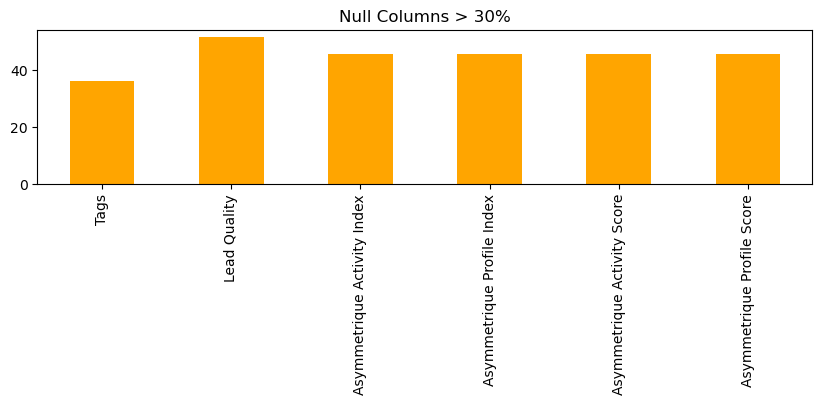

In [9]:
# Ploting the barchart for missing columns

plt.figure(figsize = (10,2), dpi=100)
nullcolumns.plot.bar(title = 'Null Columns > 30%',width = 0.5, color = 'Orange')
plt.show()

In [10]:
# Droping the columns which is having Greater > 30 %
leads_data = leads_data.drop(columns = nullcolumns.index[:])

In [11]:
# Checking shape of the data after droping null columns

leads_data.shape

(9240, 31)

In [12]:
# Checking Null values after droping null columns
(leads_data.isnull().sum()/len(leads_data)*100).sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [13]:
#!pip install sweetviz

In [14]:
#Auto EDA 
import sweetviz as sv
sweet_report = sv.analyze(leads_data)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Auto EDA Observation after droping heigest null columns
    There are 9240 Rows and 31 columns
    26 are Categorical, 4 are Numeric and 1 are Text columns
    There are no duplicate in Data
    	
#### Given columns have single value present as 'No' hence will drop these columns as these are not require for Analysis    
       'Do Not Call', 'Search', 'Magazine',
       'Newspaper Article','X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'
    

In [15]:
# Droping the single value columns which is not required for Analysis

leads_data.drop(['Do Not Call', 'Search', 'Magazine',
   'Newspaper Article','X Education Forums', 'Newspaper',
   'Digital Advertisement', 'Through Recommendations',
   'Receive More Updates About Our Courses',
   'Update me on Supply Chain Content', 'Get updates on DM Content',
   'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [16]:
# Checking shpe of the data after droping columns

leads_data.shape

(9240, 19)

###  In problem statment it was given as level called 'Select' which means student had not selected the option for that particular column which is why it shows 'Select'. These value can be consider as missing values hence we identify the value  count of the level 'Select' in all the columns.

In [17]:
# Identify the Select in all columns.

for column in leads_data:
    print(leads_data[column].astype('category').value_counts(dropna=False))
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

### Since select can also be consider as NaN value hence replacing Nan instead of Select to better missing value treatment for these columns
    City
    Lead Profile
    How did you hear about X Education
    Specialization

In [18]:
# Replacing nan instead of select
leads_data.replace('Select', np.nan, inplace=True)

In [19]:
# Checking all the columns which was having 'Select' after imputing as NaN
print(leads_data['City'].value_counts(dropna = False))

print('***************************************')

print(leads_data['Lead Profile'].value_counts(dropna = False))
print('************************************************')
print(leads_data['How did you hear about X Education'].value_counts(dropna = False))
print('************************************************')
print(leads_data['Specialization'].value_counts(dropna = False))

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
***************************************
NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
************************************************
NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64
******************************

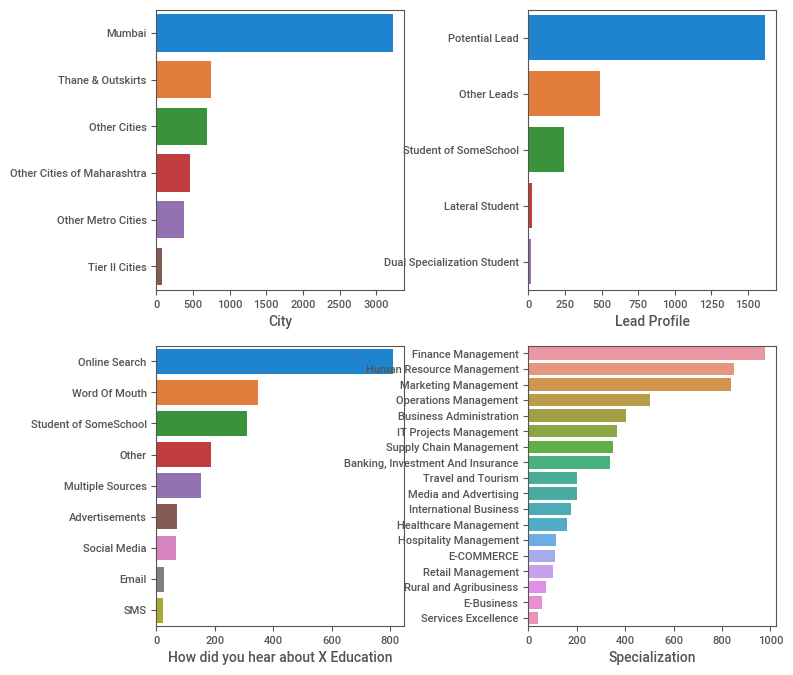

In [20]:
# Analyzing Target Columns by ploting subplot
 
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

counts = leads_data['City'].value_counts()
sns.barplot(x=counts, y=counts.index, ax=axes[0, 0], orient='h')

counts = leads_data['Lead Profile'].value_counts()
sns.barplot(x=counts, y=counts.index, ax=axes[0, 1], orient='h')

counts = leads_data['How did you hear about X Education'].value_counts()
sns.barplot(x=counts, y=counts.index, ax=axes[1, 0], orient='h')

counts = leads_data['Specialization'].value_counts()
sns.barplot(x=counts, y=counts.index, ax=axes[1, 1], orient='h')

plt.subplots_adjust(wspace=0.50)
plt.show()


In [21]:
# Checking Null values after imputing as NaN

(leads_data.isnull().sum()/len(leads_data)*100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
A free copy of Mastering The Interview            0.000000
Prospect ID                                       0.000000
Lead Number                                       0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Email                                      0.0000

## Null column treatment

### How did you hear about X Education have 78% Nan and Lead Profile have 74% as NAN hence no use of analysis of these columns hence droping


In [22]:
# Droping the most null value columns

leads_data.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [23]:
# (What matters most to you in choosing a course) columns have most null value hence checking the type and %

leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)/len(leads_data['What matters most to you in choosing a course']*100)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [24]:

# 29% are null and 70% are Better Career Prospects and rest are other hence no use of this columns hence droping this columns

# Droping the most null value columns

leads_data.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [25]:
# (What is your current occupation) columns have most null value hence checking the type and %

leads_data['What is your current occupation'].value_counts(dropna=False)/len(leads_data['What is your current occupation']*100)


Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [26]:
# 29% are null and we can not impute most updated comment randomly also we can not drop null rows it might effect in Analysis hence imputing value with min with 'Others'

leads_data['What is your current occupation'] = leads_data['What is your current occupation'].fillna('Other')

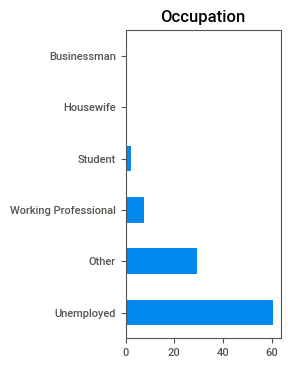

In [27]:
# Checking the null values after imputation on missing value of Occupation columns.
plt.figure(figsize = (2,4), dpi=100)
(leads_data['What is your current occupation'].value_counts(normalize= True)*100).plot.barh(title ='Occupation')
plt.show()

In [28]:

# Country columns have most null value hence checking the type and count

leads_data['Country'].value_counts(dropna=False)/len(leads_data['Country']*100)


India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [29]:
# 26% are null and 70% are India and rest are other hence no use of this columns as Mostly is India hence droping this columns

# Droping the most null value columns

leads_data.drop(['Country'], axis = 1, inplace = True)

In [30]:

# ('Specialization') columns have most null value hence checking the type and count

leads_data['Specialization'].value_counts(dropna=False)/len(leads_data['Specialization']*100)


NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [31]:
# 36% are null and we can not drop as it might effect in Analysis hence Creating new categories as 'Others' and replacing null value as this is is important variable hence we can not drop

leads_data['Specialization'] = leads_data['Specialization'].fillna('Others')

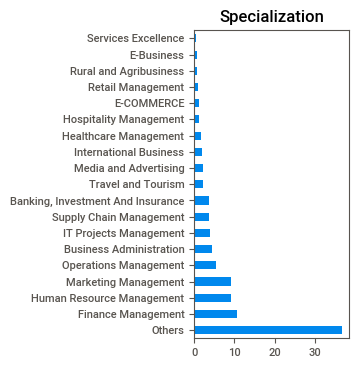

In [32]:
# Checking the null values after imputation on missing value of Occupation columns.
plt.figure(figsize = (2,4), dpi=100)
(leads_data['Specialization'].value_counts(normalize= True)*100).plot.barh(title ='Specialization')
plt.show()

In [33]:

# ('City') columns have most null value hence checking the type and count

leads_data['City'].value_counts(dropna=False)/len(leads_data['City']*100)


NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [34]:
# Droping the 'City' columns as there null value is very high and not required for Analysis

leads_data.drop(['City'], axis = 1, inplace = True)

In [35]:
# ('TotalVisits') columns have most null value hence checking the type and count

leads_data['TotalVisits'].value_counts(dropna=False)/len(leads_data['TotalVisits']*100)


0.0      0.236905
2.0      0.181818
3.0      0.141342
4.0      0.121212
5.0      0.084740
6.0      0.050433
1.0      0.042749
7.0      0.033442
8.0      0.024242
9.0      0.017749
NaN      0.014827
10.0     0.012338
11.0     0.009307
13.0     0.005195
12.0     0.004870
14.0     0.003896
16.0     0.002273
15.0     0.001948
17.0     0.001732
18.0     0.001623
20.0     0.001299
19.0     0.000974
21.0     0.000649
23.0     0.000649
24.0     0.000541
25.0     0.000541
27.0     0.000541
22.0     0.000325
29.0     0.000216
28.0     0.000216
26.0     0.000216
141.0    0.000108
55.0     0.000108
30.0     0.000108
43.0     0.000108
74.0     0.000108
41.0     0.000108
54.0     0.000108
115.0    0.000108
251.0    0.000108
32.0     0.000108
42.0     0.000108
Name: TotalVisits, dtype: float64

In [36]:
# Replacing null values with Mode Prospects as most of the coments are same

leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].mode()[0],inplace=True)

In [37]:
# ('Page Views Per Visit') columns have most null value hence checking the type and count

leads_data['Page Views Per Visit'].value_counts(dropna=False)/len(leads_data['Page Views Per Visit']*100)


0.00     0.236905
2.00     0.194264
3.00     0.129437
4.00     0.096970
1.00     0.070455
5.00     0.055952
1.50     0.033117
6.00     0.026407
2.50     0.026082
NaN      0.014827
7.00     0.014394
3.50     0.010173
8.00     0.009307
1.33     0.007143
1.67     0.006494
2.33     0.006385
2.67     0.005844
9.00     0.004870
4.50     0.004654
1.75     0.003030
3.33     0.002922
10.00    0.002706
1.25     0.002489
5.50     0.002273
2.25     0.002056
11.00    0.001948
3.67     0.001732
6.50     0.001407
1.80     0.001407
2.75     0.001299
1.40     0.001190
4.33     0.000974
14.00    0.000974
2.80     0.000974
2.20     0.000974
1.60     0.000866
2.17     0.000866
3.25     0.000866
2.40     0.000649
13.00    0.000649
1.20     0.000541
12.00    0.000541
1.43     0.000433
3.40     0.000433
2.60     0.000433
1.71     0.000433
1.83     0.000433
15.00    0.000433
1.38     0.000325
4.25     0.000325
4.75     0.000325
1.57     0.000325
16.00    0.000325
5.67     0.000325
1.78     0.000325
1.56     0

In [38]:
# Replacing null values with Mode Prospects as most of the coments are same

leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].mode()[0],inplace=True)

In [39]:
# ('Last Activity') columns have most null value hence checking the type and count

leads_data['Last Activity'].value_counts(dropna=False)/len(leads_data['Last Activity']*100)


Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [40]:
# Replacing null values with 'Mumbai' Prospects as most of the coments are same

leads_data['Last Activity'] = leads_data['Last Activity'].fillna('Email Opened')

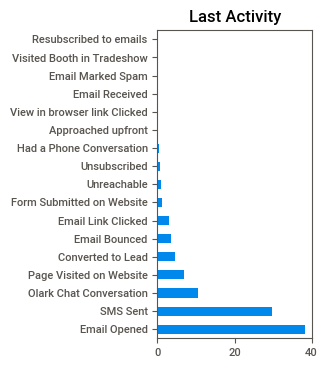

In [41]:
# Checking the null values after imputation on missing value of Occupation columns.
plt.figure(figsize = (2,4), dpi=100)
(leads_data['Last Activity'].value_counts(normalize= True)*100).plot.barh(title ='Last Activity')
plt.show()

In [42]:
# ('Lead Source') columns have most null value hence checking the type and count

leads_data['Lead Source'].value_counts(dropna=False)/len(leads_data['Lead Source']*100)


Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [43]:
# Replacing null values with 'Mumbai' Prospects as most of the coments are same

leads_data['Lead Source'] = leads_data['Lead Source'].fillna('Google')

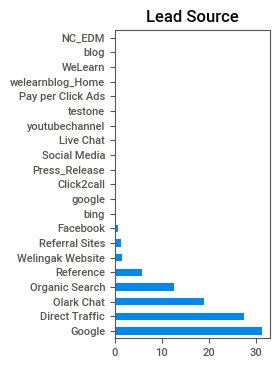

In [44]:
# Checking the null values after imputation on missing value of Occupation columns.
plt.figure(figsize = (2,4), dpi=100)
(leads_data['Lead Source'].value_counts(normalize= True)*100).plot.barh(title ='Lead Source')
plt.show()

In [45]:
# Checking Null values
(leads_data.isnull().sum()/len(leads_data)*100).sort_values(ascending = False)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [46]:
# Droping the 'Prospect ID' and 'Lead Number' columns as there null value is very high and not required for Analysis

leads_data.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

## Checking Outlier for Numerical Columns

In [47]:
# Caping Outlier before outlier treatment

leads_data.describe(percentiles=[.15,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
15%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


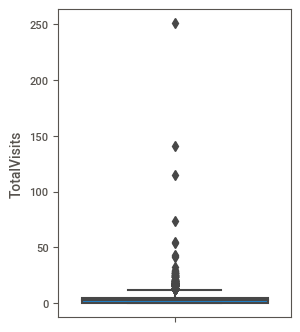

In [48]:
#Ploting boxplot to find check the outlier of 'Page Views Per Visit' columns

plt.figure(figsize=(3,4))
sns.boxplot(y=leads_data['TotalVisits'])
plt.show()

In [49]:
#Outlier Treatment by caping 

Q1 = leads_data['TotalVisits'].describe()['25%']
Q3 = leads_data['TotalVisits'].describe()['75%']
IQR = Q3 - Q1
u_bound = Q3 + 1.5 * IQR
l_bound = Q1 - 1.5 * IQR

# Cap (remove) upper outliers
leads_data['TotalVisits'] = np.where(leads_data['TotalVisits'] > u_bound, u_bound, leads_data['TotalVisits'])

# Cap (remove) lower outliers
leads_data['TotalVisits'] = np.where(leads_data['TotalVisits'] < l_bound, l_bound, leads_data['TotalVisits'])
        

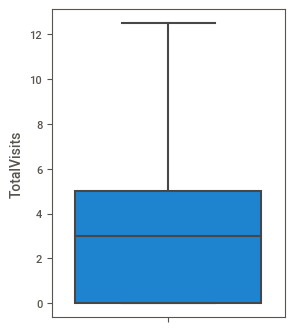

In [50]:
#Ploting after outlier treatment

plt.figure(figsize=(3,4))
sns.boxplot(y=leads_data['TotalVisits'])
plt.show()

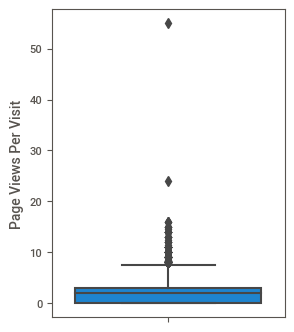

In [51]:
#Ploting boxplot to find check the outlier of 'Page Views Per Visit' columns

plt.figure(figsize=(3,4))
sns.boxplot(y=leads_data['Page Views Per Visit'])
plt.show()

In [52]:
#Outlier Treatment by caping 

Q1 = leads_data['Page Views Per Visit'].describe()['25%']
Q3 = leads_data['Page Views Per Visit'].describe()['75%']
IQR = Q3 - Q1
u_bound = Q3 + 1.5 * IQR
l_bound = Q1 - 1.5 * IQR

# Cap (remove) upper outliers
leads_data['Page Views Per Visit'] = np.where(leads_data['Page Views Per Visit'] > u_bound, u_bound, leads_data['Page Views Per Visit'])

# Cap (remove) lower outliers
leads_data['Page Views Per Visit'] = np.where(leads_data['Page Views Per Visit'] < l_bound, l_bound, leads_data['Page Views Per Visit'])
        

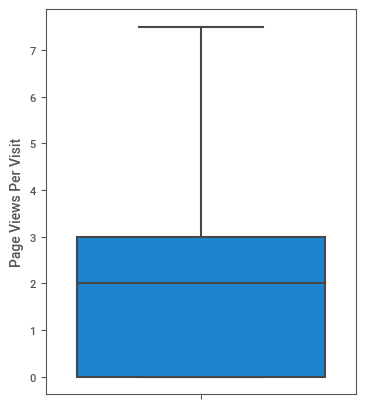

In [53]:
#Ploting after outlier treatment

plt.figure(figsize=(4,5))
sns.boxplot(y=leads_data['Page Views Per Visit'])
plt.show()

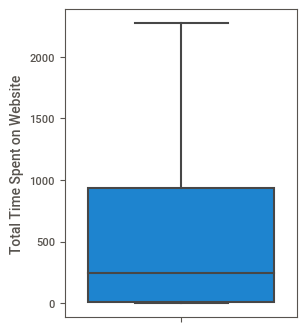

In [54]:
#Ploting boxplot to find check the outlier of 'Page Views Per Visit' columns

plt.figure(figsize=(3,4))
sns.boxplot(y=leads_data['Total Time Spent on Website'])
plt.show()

In [55]:
# Checking Shape of the data set

leads_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [56]:
leads_data.shape

(9240, 12)

In [57]:
#Auto EDA After Missing value Treatment and removing unused columns

import sweetviz as sv
sweet_report = sv.analyze(leads_data)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##  Summary of the data set after missing value treatment

1. Data set have total 9240 Rows and 37 Columns after droping 35% null value columns data set have 9240 Rows and 31 Columns
2. Droped the columns which was having 35% of null values and also it was not important aspect
4. We have found these 4 columns was having Select which can also be consider as NaN hence hence replaced Nan instead of Select to better missing value treatment<br>
    -City<br>
    -Lead Profile<br>
    -How did you hear about X Education<br>
    -Specialization
4. After replacing Select as Nana given columns was having most null value and no use of analysis of these columns hence droped the both Columns<br>
    -'How did you hear about X Education have'<br>
    -'Lead Profile'

#### Imputation of Missing values
    1. What matters most to you in choosing a course - In this columns it was 29% was Null values and 70% was Better Career Prospects so imputation with value are not used hence droped the columns
    2. What is your current occupation - In this column 29% null values and since there was already a Category as 'Other' hence imputed with Others
    3. Country - In this columns 26% was null and 70% are India and rest are other hence no use of this columns as Mostly is India hence droped the columns
    5. Specialization - 36% was null value and we can not drop as it might effect in Analysis hence Created new categories as 'Others' and replaced null value with 'Other'
    6. City - Droped the 'City' columns as there null value was very high and not required for Analysis
    7. Page Views Per Visit - In this column null values was very minor hence replaced with 0
    8. TotalVisits - In this column null values was very less and mostly it was 'Email Opened' hence imputed with most value
    9. Last Activity - In this column null values was very minor hence replaced with 0
####     Given Columns was not required for Analysis hence droped the columns
    Prospect ID' and 'Lead Number'
####     Outlier detection and Treatment
    1.We have found outlier present in 'TotalVisit' and 'Page Views Per Visit' both columns hence treated as upper outliers at u_bound and the lower outliers at l_bound while removing the top and bottom 1% of the both columns values
    2. 'Total Time Spent on Website' column do not have outlier
    
###### After Treatment of Missing vlaues and Data Cleansing we have left 12 ( 9 Categorical and 3 Numerical ) most important features and 9240 rows.    

## Visualising the Data(EDA)

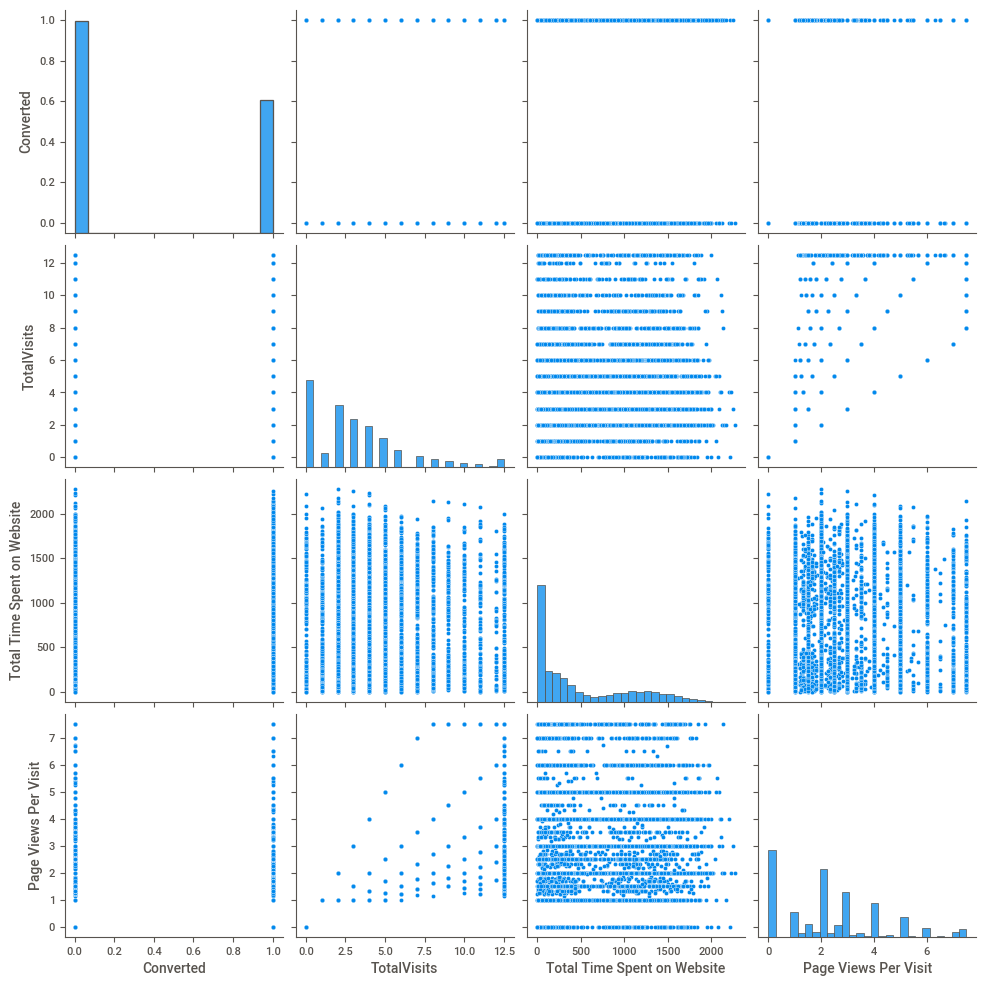

In [58]:
# Makin a pairplot of all the numeric variables
sns.pairplot(leads_data)
plt.show()

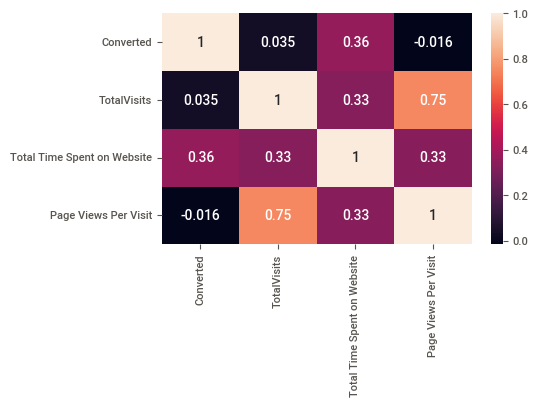

In [59]:
# checking the correlation matrix 
plt.figure(figsize = (5,3))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

In [60]:
# Checkig Data information

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [61]:
# Making Same category

leads_data['Lead Source'].replace('google','Google', inplace = True)

In [62]:
# Replacing small number of Leadsource into new category

small_value = ['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM']

leads_data['Lead Source'].replace(small_value,'Others', inplace = True)

In [63]:
# Rename the columns as columns name are very long

leads_data = leads_data.rename(columns={'Total Time Spent on Website': 'TimeSpent', 'Page Views Per Visit': 'PagePerVisit', 'What is your current occupation': 'Occupation','A free copy of Mastering The Interview': 'FreeCopy','Last Notable Activity': 'NotableActivity'})


In [64]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lead Origin      9240 non-null   object 
 1   Lead Source      9240 non-null   object 
 2   Do Not Email     9240 non-null   object 
 3   Converted        9240 non-null   int64  
 4   TotalVisits      9240 non-null   float64
 5   TimeSpent        9240 non-null   int64  
 6   PagePerVisit     9240 non-null   float64
 7   Last Activity    9240 non-null   object 
 8   Specialization   9240 non-null   object 
 9   Occupation       9240 non-null   object 
 10  FreeCopy         9240 non-null   object 
 11  NotableActivity  9240 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 866.4+ KB


In [65]:
# Cheking Imbalance of the Converted variable

leads_data['Converted'].value_counts(normalize = True)*100


0    61.461039
1    38.538961
Name: Converted, dtype: float64

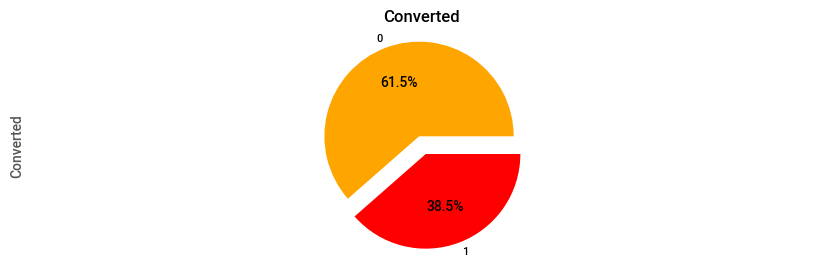

In [66]:
# Analyzing Converted Columns by ploting Pie Chart

plt.figure(figsize = [10,3])
colors = ['Orange', 'red']
explode = [0, 0.2]
leads_data.Converted.value_counts().plot.pie(title = 'Converted',explode = explode,colors = colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [67]:
print('Conveted      : 38.5%')
print('Not Conveted  : 61.5%')

Conveted      : 38.5%
Not Conveted  : 61.5%


In [68]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lead Origin      9240 non-null   object 
 1   Lead Source      9240 non-null   object 
 2   Do Not Email     9240 non-null   object 
 3   Converted        9240 non-null   int64  
 4   TotalVisits      9240 non-null   float64
 5   TimeSpent        9240 non-null   int64  
 6   PagePerVisit     9240 non-null   float64
 7   Last Activity    9240 non-null   object 
 8   Specialization   9240 non-null   object 
 9   Occupation       9240 non-null   object 
 10  FreeCopy         9240 non-null   object 
 11  NotableActivity  9240 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 866.4+ KB


In [69]:
leads_data['TotalVisits'].value_counts()

0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
12.5     222
9.0      164
10.0     114
11.0      86
12.0      45
Name: TotalVisits, dtype: int64

### Data Imbalance is 61.5% is Not Converted and 38.5% is Converted

## Univariate Analysis

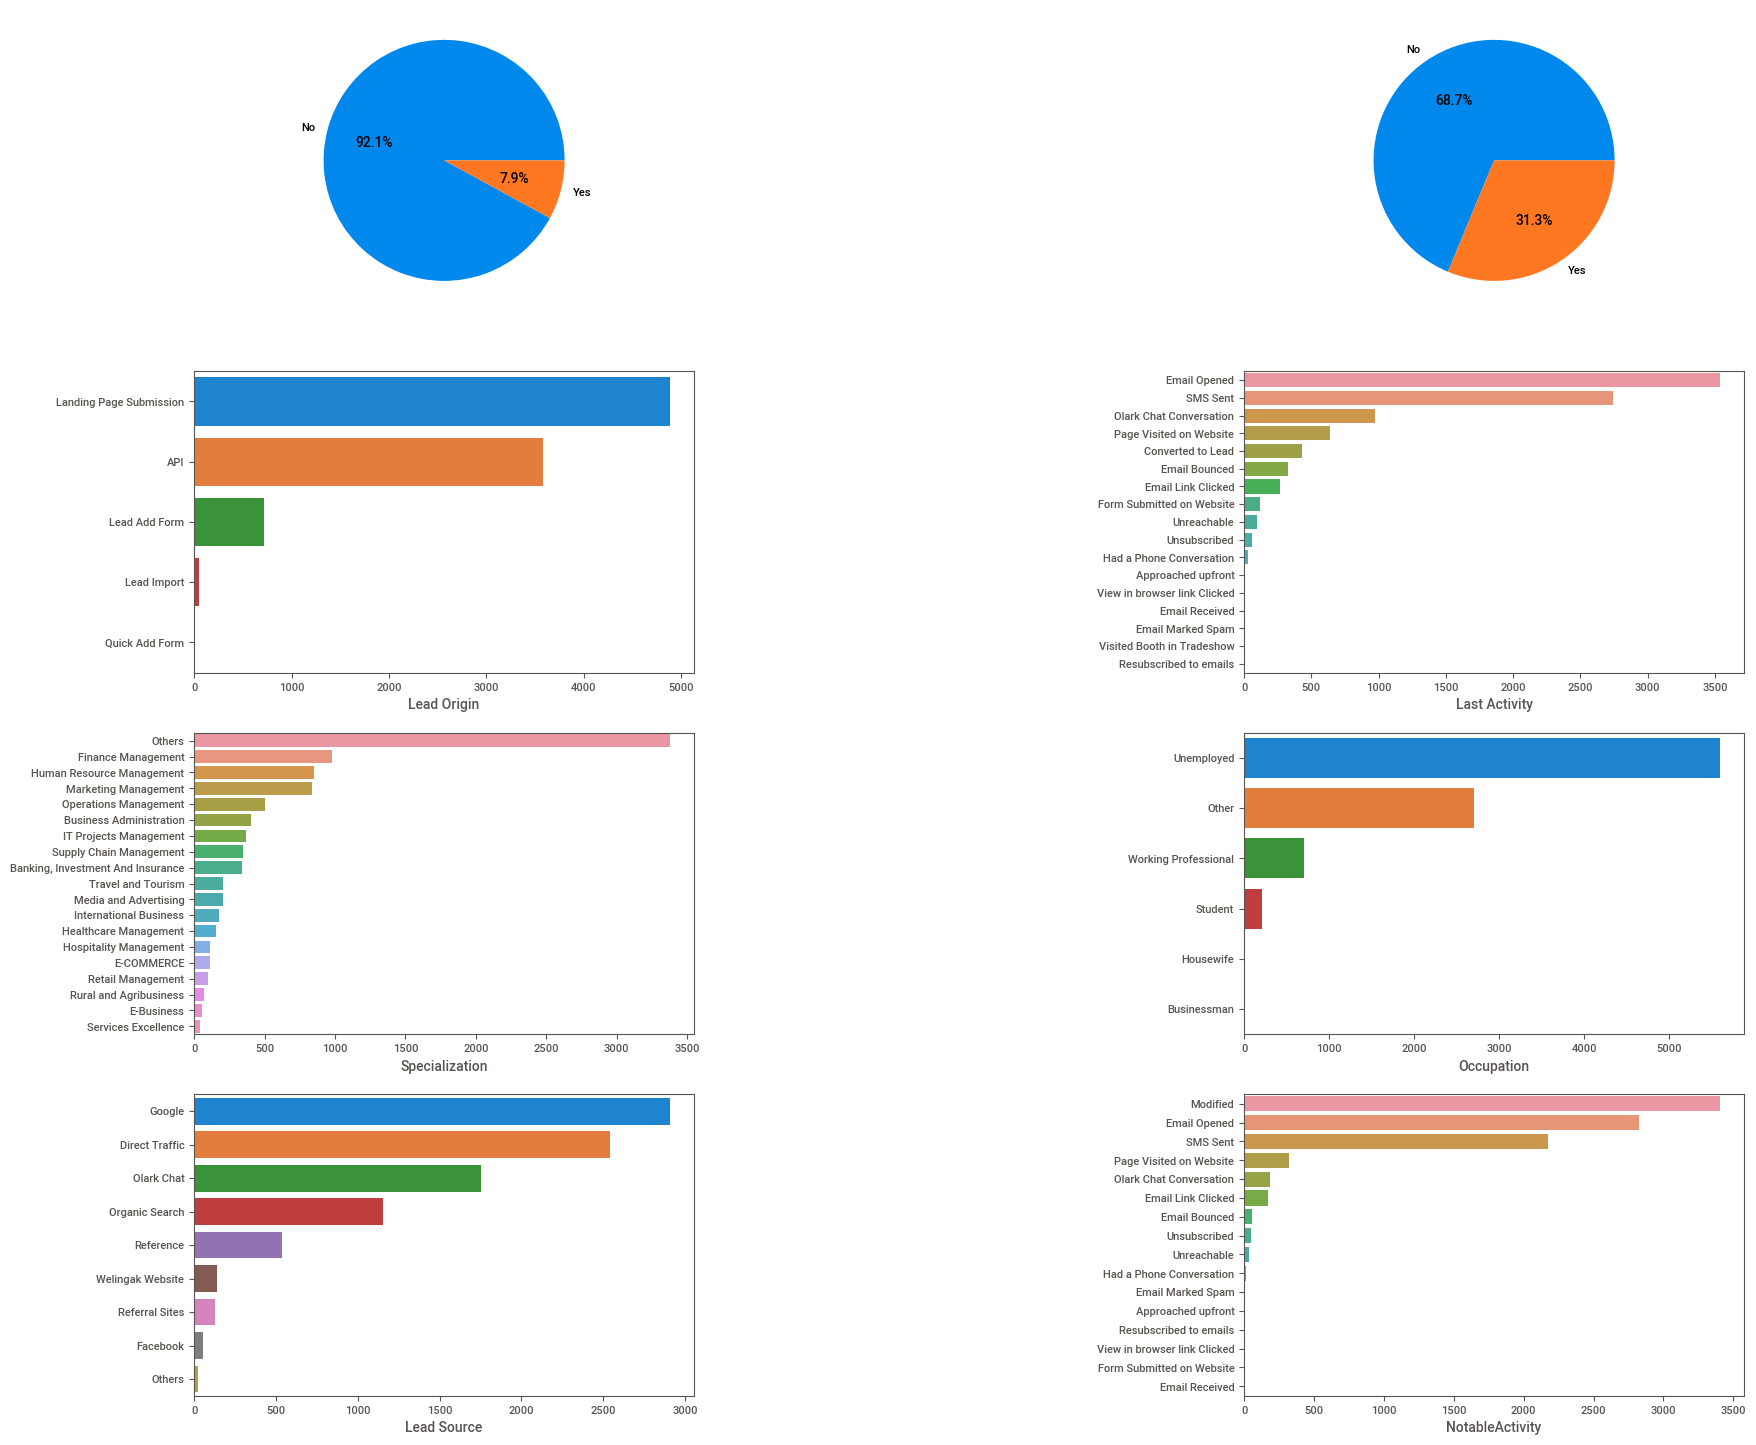

In [70]:
#  Analyzing Target Columns by ploting subplot
 
fig, axes = plt.subplots(4, 2, figsize=(20, 18))

counts = leads_data['Do Not Email'].value_counts()*100
axes[0, 0].pie(counts, labels=counts.index, autopct='%1.1f%%')

counts = leads_data['FreeCopy'].value_counts()*100
axes[0, 1].pie(counts, labels=counts.index, autopct='%1.1f%%')

counts = leads_data['Lead Origin'].value_counts()
sns.barplot(x=counts, y=counts.index, ax=axes[1, 0], orient='h')


counts = leads_data['Last Activity'].value_counts()
sns.barplot(x=counts, y=counts.index, ax=axes[1, 1], orient='h')

counts = leads_data['Specialization'].value_counts()
sns.barplot(x=counts, y=counts.index, ax=axes[2, 0], orient='h')

counts = leads_data['Occupation'].value_counts()
sns.barplot(x=counts, y=counts.index, ax=axes[2, 1], orient='h')

counts = leads_data['Lead Source'].value_counts()
sns.barplot(x=counts, y=counts.index, ax=axes[3, 0], orient='h')


counts = leads_data['NotableActivity'].value_counts()
sns.barplot(x=counts, y=counts.index, ax=axes[3, 1], orient='h')

plt.subplots_adjust(wspace=1.10)
plt.show()


In [71]:
print('FreeCopy')

FreeCopy


## Bi variate Analysis

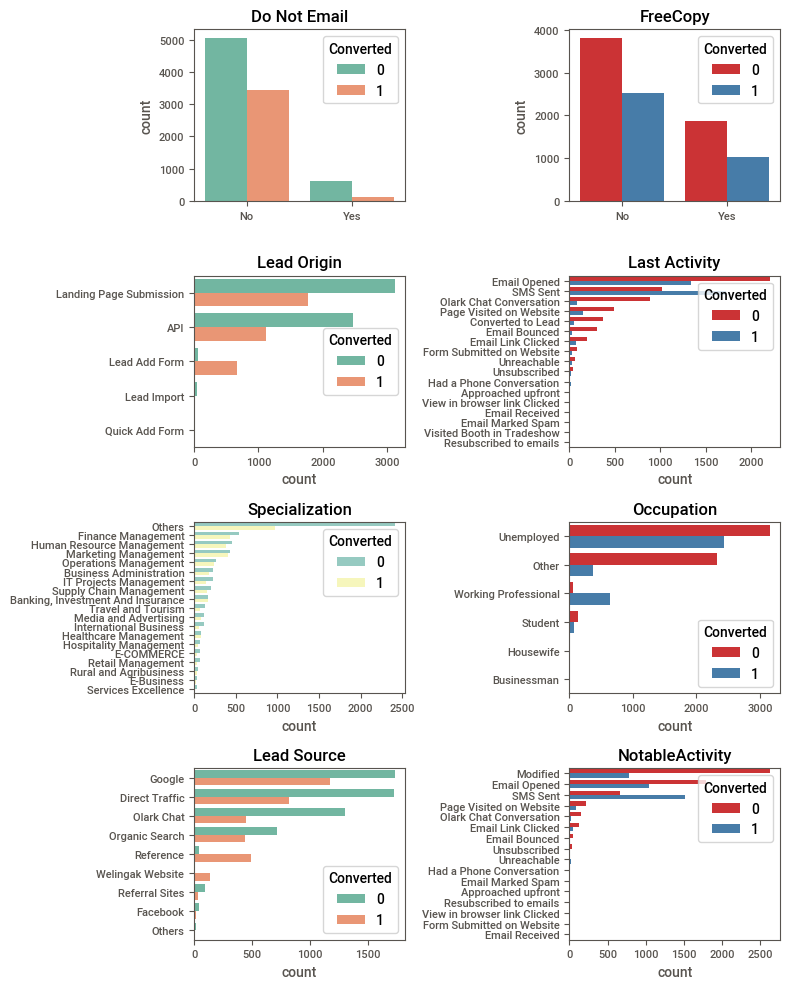

In [72]:
# Ploting countplot for each varaibale targeting Converted column

fig, axes = plt.subplots(4, 2, figsize=(8, 10), dpi=100)

order_dne = leads_data['Do Not Email'].value_counts().index
order_fc = leads_data['FreeCopy'].value_counts().index
order_lo = leads_data['Lead Origin'].value_counts().index
order_la = leads_data['Last Activity'].value_counts().index
order_s = leads_data['Specialization'].value_counts().index
order_o = leads_data['Occupation'].value_counts().index
order_ls = leads_data['Lead Source'].value_counts().index
order_na = leads_data['NotableActivity'].value_counts().index



sns.countplot(x='Do Not Email', hue='Converted', data=leads_data, ax=axes[0, 0], palette='Set2', order=order_dne)
sns.countplot(x='FreeCopy', hue='Converted', data=leads_data, ax=axes[0, 1], palette='Set1', order=order_fc)

sns.countplot(y='Lead Origin', hue='Converted', data=leads_data, ax=axes[1, 0], palette='Set2', order=order_lo)
sns.countplot(y='Last Activity', hue='Converted', data=leads_data, ax=axes[1, 1], palette='Set1', order=order_la)
sns.countplot(y='Specialization', hue='Converted', data=leads_data, ax=axes[2, 0], palette='Set3', order=order_s)
sns.countplot(y='Occupation', hue='Converted', data=leads_data, ax=axes[2, 1], palette='Set1', order=order_o)
sns.countplot(y='Lead Source', hue='Converted', data=leads_data, ax=axes[3, 0], palette='Set2', order=order_ls)
sns.countplot(y='NotableActivity', hue='Converted', data=leads_data, ax=axes[3, 1], palette='Set1', order=order_na)

axes[0, 0].set_title('Do Not Email')
axes[0, 1].set_title('FreeCopy')
axes[1, 0].set_title('Lead Origin')
axes[1, 1].set_title('Last Activity')
axes[2, 0].set_title('Specialization')
axes[2, 1].set_title('Occupation')
axes[3, 0].set_title('Lead Source')
axes[3, 1].set_title('NotableActivity')

axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')

axes[1,0].set_ylabel('')
axes[1,1].set_ylabel('')
axes[2,0].set_ylabel('')
axes[2,1].set_ylabel('')
axes[3,0].set_ylabel('')
axes[3,1].set_ylabel('')
    
plt.tight_layout()
plt.show()


## EDA Obeservation
    Data Imbalance - 61.5% is not coverted and 38.5% Converted
####   Univariate Analysis Summary
        Do Not Email – 68.7% client has asked for not to email wherein 31.3% client is interested to send email
        Free Copy – Approx. 8% client is interested to share Free copy
        Occupation – Compare to Student Unemployed 
        Last Activity – Email Opened and SMS received % client are very high compare to Others
        Lead Origin – Landing Page Submission clients are high 
        Lead Source – Most Numbers of client visited through Google and the very less from others source
        Specialization – Mostly client visited for Finance, HR, Marketing, however large customer has not selected any category
#### Observation :- 
        As We can See most of the clients visited through the advertising using google and Direct Traffic hence they should increase Online Advertising
        Unemployed client is high hence we should focus on Unemployed clients
        Finance, HR and Marketing specialization clients are very high, we should firs focus on these clients
#### Bivariate Analysis Summary

        Do Not Email – Lead conversion for the Client who has asked for mail is highest conversion rate wherein not to email has very less conversion
        Lead Source-Mostly client wo has visited through online source such as google has heighest conversion rate. Company should focus on advertising in online portal
        Specialization –Finance, HR and Marketing Specialization conversion is high chances of lead conversion hence we should focus on this area
        Occupation –Unemployed client has heighest conversion rate where in Business occupation no conversion rate. Company should also target on Student and Working professional as working professional have very high conversion chances companion to others.

## Step 3- Data Prepration for Modeling ( train-test split and rescaling )

In [73]:
# List of variables to map
leads_data['Do Not Email'] = leads_data['Do Not Email'].map({'Yes': 1, "No": 0})
leads_data['FreeCopy'] = leads_data['FreeCopy'].map({'Yes': 1, "No": 0})


In [74]:
leads_data.head(1)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,TimeSpent,PagePerVisit,Last Activity,Specialization,Occupation,FreeCopy,NotableActivity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,Modified


In [75]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Occupation','NotableActivity']], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)



In [76]:
# Droping the colums for which the dummy variables have created

leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Occupation','NotableActivity'], 1)

In [77]:
leads_data.shape

(9240, 72)

## Train Test Split

In [78]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)

X.head()


,Do Not Email,TotalVisits,TimeSpent,PagePerVisit,FreeCopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,NotableActivity_Email Bounced,NotableActivity_Email Link Clicked,NotableActivity_Email Marked Spam,NotableActivity_Email Opened,NotableActivity_Email Received,NotableActivity_Form Submitted on Website,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [79]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [80]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [81]:
# Scaling numerical variable data

scaler = MinMaxScaler()

X_train[['TotalVisits', 'PagePerVisit', 'TimeSpent']] = scaler.fit_transform(X_train[['TotalVisits', 'PagePerVisit', 'TimeSpent']])

X_train.head()

,Do Not Email,TotalVisits,TimeSpent,PagePerVisit,FreeCopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,NotableActivity_Email Bounced,NotableActivity_Email Link Clicked,NotableActivity_Email Marked Spam,NotableActivity_Email Opened,NotableActivity_Email Received,NotableActivity_Form Submitted on Website,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked
1871,0,0.00,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.32,0.214349,0.177333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.40,0.046655,0.333333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.40,0.541373,0.666667,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,0.00,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [82]:
leads_data.corr()

,Do Not Email,Converted,TotalVisits,TimeSpent,PagePerVisit,FreeCopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,NotableActivity_Email Bounced,NotableActivity_Email Link Clicked,NotableActivity_Email Marked Spam,NotableActivity_Email Opened,NotableActivity_Email Received,NotableActivity_Form Submitted on Website,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked
Do Not Email,1.000000,-0.135580,0.002601,-0.046374,0.022554,0.055762,0.095304,-0.020983,-0.017529,0.035416,-0.017529,-0.062113,-0.051436,0.034295,0.009421,-0.038451,-0.010149,-0.000911,-0.062835,0.618470,-0.043505,0.050089,-0.224090,-0.004322,-0.018744,-0.009730,-0.055143,0.082217,-0.003056,-0.017564,0.006465,0.262686,-0.007488,-0.003056,0.003893,0.012636,0.033293,-0.004597,0.013447,0.010674,-0.019910,0.069613,0.005416,-0.027271,-0.000343,-0.014036,-0.037805,0.023426,0.028032,0.053781,0.002680,0.059722,-0.009669,0.049287,0.006225,-0.019533,-0.049841,0.275213,-0.037624,0.050089,-0.188089,-0.003056,-0.003056,-0.011443,0.117259,-0.013032,0.049921,-0.003056,-0.025990,-0.010505,0.243408,-0.003056
Converted,-0.135580,1.000000,0.035074,0.362483,-0.015978,-0.039820,-0.051236,0.321702,-0.023695,0.013138,-0.023695,0.026286,-0.129459,-0.005879,0.000607,0.270830,-0.033058,0.154153,-0.117383,-0.120095,-0.039690,0.018581,-0.013850,0.018581,-0.033364,0.040803,-0.210809,-0.083771,0.013138,0.325600,-0.010785,-0.020618,-0.011456,-0.008238,0.025791,-0.002747,-0.006429,0.043308,0.030306,0.008190,0.047130,-0.001200,-0.007441,0.065853,0.010264,0.043272,-0.154025,-0.009755,0.007200,-0.014956,0.019245,-0.009457,0.041567,-0.323908,-0.004375,0.128710,0.313837,-0.039101,-0.035555,0.018581,-0.021955,0.013138,-0.008238,0.043476,-0.244294,-0.072660,-0.036051,0.013138,0.351845,0.036594,-0.012858,-0.008238
TotalVisits,0.002601,0.035074,1.000000,0.328152,0.746084,0.297883,0.443553,-0.289587,-0.079016,-0.011127,-0.077143,0.197886,-0.463752,0.301734,0.002589,-0.247747,0.091275,-0.125564,-0.096222,-0.069539,-0.026681,0.003849,0.044558,0.011194,0.022544,0.015881,-0.201005,0.237471,-0.011127,0.022066,0.026921,0.011098,0.024341,0.002722,0.068565,0.029581,0.040334,0.085220,0.051511,0.026793,0.087965,0.051653,0.058676,0.043743,0.071274,0.046739,-0.385635,0

In [83]:
# Import LogisticRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [84]:
# Creating a LogisticRegression object

logreg.fit(X_train,y_train)

print("Training Accuracy")
print(logreg.score(X_train,y_train))
print("Testing Accuracy")
print(logreg.score(X_test,y_test))

pred = logreg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training Accuracy
0.8285405071119357
Testing Accuracy
0.49783549783549785
[[ 353 1324]
 [  68 1027]]
              precision    recall  f1-score   support

           0       0.84      0.21      0.34      1677
           1       0.44      0.94      0.60      1095

    accuracy                           0.50      2772
   macro avg       0.64      0.57      0.47      2772
weighted avg       0.68      0.50      0.44      2772



In [85]:
logreg.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.09501606, 0.90498394],
       [0.        , 1.        ],
       ...,
       [0.71151168, 0.28848832],
       [0.        , 1.        ],
       [0.09501606, 0.90498394]])

## Step 4- Model Building

In [86]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [87]:
#Checking which features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('TimeSpent', True, 1),
 ('PagePerVisit', False, 3),
 ('FreeCopy', False, 24),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 52),
 ('Lead Source_Others', False, 26),
 ('Lead Source_Reference', False, 25),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 8),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', False, 17),
 ('Last Activity_Email Marked Spam', False, 37),
 ('Last Activity_Email Opened', False, 43),
 ('Last Activity_Email Received', False, 42),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Had a Phone 

In [88]:
# Puting all the columns into col which have been selected by RFE

col = X_train.columns[rfe.support_]


In [89]:
# Selecting only the columns selected by RFE

X_train = X_train[col]

X_train.columns

Index(['Do Not Email', 'TimeSpent', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Others', 'Occupation_Housewife', 'Occupation_Other',
       'Occupation_Working Professional',
       'NotableActivity_Had a Phone Conversation',
       'NotableActivity_Unreachable'],
      dtype='object')

In [90]:
# Importing the statsmodel

import statsmodels.api as sm

In [91]:
# Fiting a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

logm1.params

const                                       -1.247432
Do Not Email                                -1.326491
TimeSpent                                    4.445009
Lead Origin_Landing Page Submission         -1.005135
Lead Origin_Lead Add Form                    2.846930
Lead Source_Olark Chat                       1.157651
Lead Source_Welingak Website                 2.426731
Last Activity_Had a Phone Conversation       0.586540
Last Activity_Olark Chat Conversation       -1.163354
Last Activity_SMS Sent                       1.337649
Specialization_Others                       -0.932195
Occupation_Housewife                        22.828183
Occupation_Other                            -1.093422
Occupation_Working Professional              2.400574
NotableActivity_Had a Phone Conversation     2.974185
NotableActivity_Unreachable                  1.953192
dtype: float64

In [92]:
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.7
Date:                Mon, 16 Oct 2023   Deviance:                       5253.5
Time:                        19:35:09   Pearson chi2:                 7.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4038
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [93]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.38
2,Lead Origin_Landing Page Submission,2.17
6,Last Activity_Had a Phone Conversation,2.02
13,NotableActivity_Had a Phone Conversation,2.00
4,Lead Source_Olark Chat,1.96
1,TimeSpent,1.93
11,Occupation_Other,1.61
8,Last Activity_SMS Sent,1.54
7,Last Activity_Olark Chat Conversation,1.47
3,Lead Origin_Lead Add Form,1.43


### VIF Looks decent
### P value for Occupation_Housewife is quite high hence droping the feature


In [95]:
# Droping Occupation_Housewife features as P value of this feature is high
X_train.drop('Occupation_Housewife', axis = 1, inplace = True)

In [96]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
logm2.params

const                                      -1.239527
Do Not Email                               -1.332271
TimeSpent                                   4.440963
Lead Origin_Landing Page Submission        -1.000374
Lead Origin_Lead Add Form                   2.861737
Lead Source_Olark Chat                      1.157093
Lead Source_Welingak Website                2.411614
Last Activity_Had a Phone Conversation      0.579653
Last Activity_Olark Chat Conversation      -1.166648
Last Activity_SMS Sent                      1.329654
Specialization_Others                      -0.935591
Occupation_Other                           -1.097298
Occupation_Working Professional             2.392195
NotableActivity_Had a Phone Conversation    2.970632
NotableActivity_Unreachable                 1.945436
dtype: float64

In [97]:
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.3
Date:                Mon, 16 Oct 2023   Deviance:                       5266.6
Time:                        19:35:09   Pearson chi2:                 7.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2395      0.133     -9.290      0.000      -1.501      -0.978
Do Not Email                                -1.3323      0.166     -8.045      0.000      -1.657      -1.008
TimeSpent                                    4.4410      0.165     26.961      0.000       4.118       4.764
Lead Origin_Landing Page Submission         -1.0004      0.127     -7.863      0.000      -1.250      -0.751
Lead Origin_Lead Add Form                    2.8617      0.202     14.148      0.000       2.465       3.258
Lead Source_Olark Chat                       1.1571      0.123      9.426      0.000       0.917       1.398
Lead Source_Welingak Website                 2.4116      0.746      3.235      0.001       0.950       3.873
Last Activity_Had a Phone Conversation       0.5797      0.969      0.598      0.550      -1.320       2.480
Last Activity_Olark Chat Conversation       -1.1666      0.171     -6.840      0.000      -1.501      -0.832
Last Activity_SMS Sent                       1.3297      0.074     17.921      0.000       1.184       1.475
Specialization_Others                       -0.9356      0.122     -7.655      0.000      -1.175      -0.696
Occupation_Other                            -1.0973      0.087    -12.603      0.000      -1.268      -0.927
Occupation_Working Professional              2.3922      0.189     12.641      0.000       2.021       2.763
NotableActivity_Had a Phone Conversation     2.9706      1.484      2.002      0.045       0.062       5.879
NotableActivity_Unreachable                  1.9454      0.549      3.545      0.000       0.870       3.021
============================================================================================================
"""

In [98]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.38
2,Lead Origin_Landing Page Submission,2.17
6,Last Activity_Had a Phone Conversation,2.02
12,NotableActivity_Had a Phone Conversation,2.00
4,Lead Source_Olark Chat,1.96
1,TimeSpent,1.93
10,Occupation_Other,1.61
8,Last Activity_SMS Sent,1.54
7,Last Activity_Olark Chat Conversation,1.47
3,Lead Origin_Lead Add Form,1.42


### VIF Looks decent
### P value for 'Last Activity_Had a Phone Conversation' is quite high hence droping the feature


In [99]:
# Droping Occupation_Housewife features as P value of this feature is high
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [100]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
logm3.params

const                                      -1.238858
Do Not Email                               -1.332563
TimeSpent                                   4.443040
Lead Origin_Landing Page Submission        -1.000639
Lead Origin_Lead Add Form                   2.863589
Lead Source_Olark Chat                      1.156402
Lead Source_Welingak Website                2.409091
Last Activity_Olark Chat Conversation      -1.167667
Last Activity_SMS Sent                      1.328465
Specialization_Others                      -0.935086
Occupation_Other                           -1.097217
Occupation_Working Professional             2.395105
NotableActivity_Had a Phone Conversation    3.549576
NotableActivity_Unreachable                 1.944499
dtype: float64

In [101]:
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.5
Date:                Mon, 16 Oct 2023   Deviance:                       5267.0
Time:                        19:35:09   Pearson chi2:                 7.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4025
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [102]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Others,2.38
2,Lead Origin_Landing Page Submission,2.17
4,Lead Source_Olark Chat,1.96
1,TimeSpent,1.93
9,Occupation_Other,1.61
7,Last Activity_SMS Sent,1.54
6,Last Activity_Olark Chat Conversation,1.47
3,Lead Origin_Lead Add Form,1.42
5,Lead Source_Welingak Website,1.27
10,Occupation_Working Professional,1.21



### P-values and VIFs both are looking decent for all the features. 
### Moving ahead for making predictions using this final set of features.

In [103]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = logm3.predict(sm.add_constant(X_train))
y_train_pred[:12]

1871    0.479398
6795    0.097772
3516    0.307837
8105    0.816724
3934    0.265506
4844    0.988124
3297    0.111722
8071    0.990867
987     0.157443
7423    0.901239
1032    0.855916
6542    0.354769
dtype: float64

In [104]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:12]

array([0.47939754, 0.09777247, 0.30783673, 0.81672434, 0.26550645,
       0.98812447, 0.11172165, 0.99086697, 0.15744311, 0.90123889,
       0.85591629, 0.35476872])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [105]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.479398
1,0,0.097772
2,0,0.307837
3,0,0.816724
4,0,0.265506


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [106]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.479398,0
1,0,0.097772,0
2,0,0.307837,0
3,0,0.816724,1
4,0,0.265506,0


## Step 5- Model Evaluation

In [107]:
# Importing Libraries

from sklearn import metrics

In [108]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3551  451]
 [ 741 1725]]


In [109]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8157081014223871


In [110]:
# Evaluateing the other metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6995133819951338

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.8873063468265867

In [113]:
# Calculate false postive rate - predicting converted when customer does not have Converted
print(FP/ float(TN+FP))

0.11269365317341329


In [114]:
# positive predictive value 

print (TP / float(TP+FP))

0.7927389705882353


In [115]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8273532152842498


### Plotting the ROC Curve

In [116]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

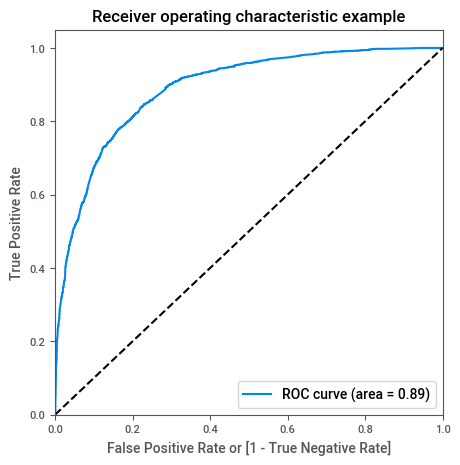

In [118]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### The area under the ROC curve is 0.89 which is indicating that we have a good model.finding the optimal cutoff point.


In [119]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.479398,0,1,1,1,1,1,0,0,0,0,0
1,0,0.097772,0,1,0,0,0,0,0,0,0,0,0
2,0,0.307837,0,1,1,1,1,0,0,0,0,0,0
3,0,0.816724,1,1,1,1,1,1,1,1,1,1,0
4,0,0.265506,0,1,1,1,0,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.579623  0.983779  0.330585
0.2   0.2  0.765925  0.918086  0.672164
0.3   0.3  0.799474  0.845499  0.771114
0.4   0.4  0.814626  0.770884  0.841579
0.5   0.5  0.815708  0.699513  0.887306
0.6   0.6  0.798547  0.602595  0.919290
0.7   0.7  0.784941  0.523520  0.946027
0.8   0.8  0.763760  0.432279  0.968016
0.9   0.9  0.713049  0.265207  0.989005


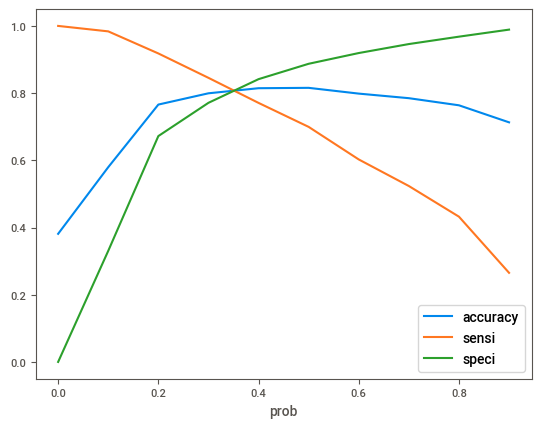

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.35 is the optimum point to take it as a cutoff probability. So let's choose 0.35 as our cutoff now. 

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.479398,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.097772,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.307837,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.816724,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.265506,0,1,1,1,0,0,0,0,0,0,0,0


In [123]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8070500927643784

In [124]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3245,  757],
       [ 491, 1975]], dtype=int64)

In [125]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Calculate Sensitivity

TP/(TP+FN)

0.8008921330089214

In [127]:
# Calculate Specificity

TN/(TN+FP)

0.8108445777111444

## Output:
The ROC curve has a value of 0.89, which is very good. We have the following values for the Train Data:

Accuracy    : 80.76%<br>
Sensitivity : 80.17%<br>
Specificity : 81.13%


## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [128]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3551,  451],
       [ 741, 1725]], dtype=int64)

##### Precision
TP / TP + FP

In [129]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7927389705882353

##### Recall
TP / TP + FN

In [130]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6995133819951338

### Precision and recall tradeoff

In [131]:
from sklearn.metrics import precision_recall_curve

In [132]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

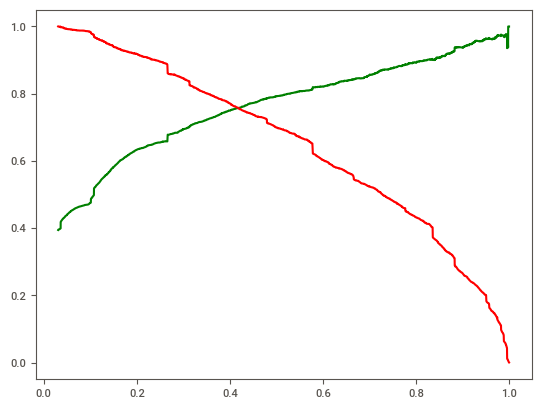

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.479398,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.097772,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.307837,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.816724,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.265506,0,1,1,1,0,0,0,0,0,0,0,0


In [136]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8150896722325294

In [137]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3391,  611],
       [ 585, 1881]], dtype=int64)

In [138]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Calculate Precision

TP/(TP+FP)

0.7548154093097913

In [140]:
# Calculate Recall

TP/(TP+FN)

0.7627737226277372

In [141]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Do Not Email                                  2772 non-null   int64  
 1   TotalVisits                                   2772 non-null   float64
 2   TimeSpent                                     2772 non-null   int64  
 3   PagePerVisit                                  2772 non-null   float64
 4   FreeCopy                                      2772 non-null   int64  
 5   Lead Origin_Landing Page Submission           2772 non-null   uint8  
 6   Lead Origin_Lead Add Form                     2772 non-null   uint8  
 7   Lead Origin_Lead Import                       2772 non-null   uint8  
 8   Lead Origin_Quick Add Form                    2772 non-null   uint8  
 9   Lead Source_Facebook                          2772 non-null 

#### This cutoff point seems good to go!
## Step 6- Prediction on the test data

Let's now make predicitons on the test set.

In [142]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'PagePerVisit', 'TimeSpent']] = scaler.transform(X_test[['TotalVisits', 'PagePerVisit', 'TimeSpent']])

In [143]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,TimeSpent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Occupation_Housewife,Occupation_Other,Occupation_Working Professional,NotableActivity_Had a Phone Conversation,NotableActivity_Unreachable
4269,0,0.444982,0,0,0,0,0,0,1,1,0,1,0,0,0
2376,0,0.000000,0,1,0,0,0,0,1,1,0,0,0,0,0
7766,0,0.025968,0,0,0,0,0,0,0,0,0,0,1,0,1
9199,0,0.000000,0,0,1,0,0,1,0,1,0,0,0,0,0
4359,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0


In [144]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Do Not Email,TimeSpent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Occupation_Housewife,Occupation_Other,Occupation_Working Professional,NotableActivity_Had a Phone Conversation,NotableActivity_Unreachable
4269,1.0,0,0.444982,0,0,0,0,0,0,1,1,0,1,0,0,0
2376,1.0,0,0.000000,0,1,0,0,0,0,1,1,0,0,0,0,0
7766,1.0,0,0.025968,0,0,0,0,0,0,0,0,0,0,1,0,1
9199,1.0,0,0.000000,0,0,1,0,0,1,0,1,0,0,0,0,0
4359,1.0,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0,0.127641,1,0,0,0,0,0,0,0,0,1,0,0,0
2152,1.0,0,0.000000,0,1,0,0,0,0,1,1,0,0,0,0,0
7101,1.0,0,0.000000,0,0,1,0,0,0,0,1,0,0,0,0,0
5331,1.0,1,0.707746,1,0,0,0,0,0,0,0,0,1,0,0,0


In [145]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TimeSpent                                 2772 non-null   float64
 2   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 3   Lead Origin_Lead Add Form                 2772 non-null   uint8  
 4   Lead Source_Olark Chat                    2772 non-null   uint8  
 5   Lead Source_Welingak Website              2772 non-null   uint8  
 6   Last Activity_Had a Phone Conversation    2772 non-null   uint8  
 7   Last Activity_Olark Chat Conversation     2772 non-null   uint8  
 8   Last Activity_SMS Sent                    2772 non-null   uint8  
 9   Specialization_Others                     2772 non-null   uint8  
 10  Occupation_Housewife             

In [146]:
# Drop the required columns from X_test as well

X_test.drop(['Occupation_Housewife', 'Last Activity_Had a Phone Conversation'], 1, inplace = True)

In [147]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = logm3.predict(sm.add_constant(X_test))
y_test_pred[:12]

4269    0.508594
2376    0.882685
7766    0.961437
9199    0.101087
4359    0.835447
9186    0.570961
1631    0.435730
8963    0.161129
8007    0.065131
5324    0.354769
2558    0.281665
8973    0.118084
dtype: float64

In [148]:
# Reshaping it into an array

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:12]

array([0.50859369, 0.88268541, 0.96143656, 0.10108664, 0.83544652,
       0.57096073, 0.43572961, 0.16112882, 0.06513129, 0.35476872,
       0.28166484, 0.11808441])

In [149]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
# Let's see the head

y_pred_1.head()

,0
0,0.508594
1,0.882685
2,0.961437
3,0.101087
4,0.835447


In [151]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [152]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.508594
1,1,0.882685
2,1,0.961437
3,0,0.101087
4,1,0.835447


In [154]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.508594
1,1,0.882685
2,1,0.961437
3,0,0.101087
4,1,0.835447


In [155]:
# Make predictions on the test set using 0.35 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.508594,1
1,1,0.882685,1
2,1,0.961437,1
3,0,0.101087,0
4,1,0.835447,1


In [156]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8138528138528138

In [157]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1369,  308],
       [ 208,  887]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8100456621004566

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.8163387000596303

In [161]:
# features and their coefficicent from final model
parameters=logm3.params.sort_values(ascending=False)
parameters

TimeSpent                                   4.443040
NotableActivity_Had a Phone Conversation    3.549576
Lead Origin_Lead Add Form                   2.863589
Lead Source_Welingak Website                2.409091
Occupation_Working Professional             2.395105
NotableActivity_Unreachable                 1.944499
Last Activity_SMS Sent                      1.328465
Lead Source_Olark Chat                      1.156402
Specialization_Others                      -0.935086
Lead Origin_Landing Page Submission        -1.000639
Occupation_Other                           -1.097217
Last Activity_Olark Chat Conversation      -1.167667
const                                      -1.238858
Do Not Email                               -1.332563
dtype: float64

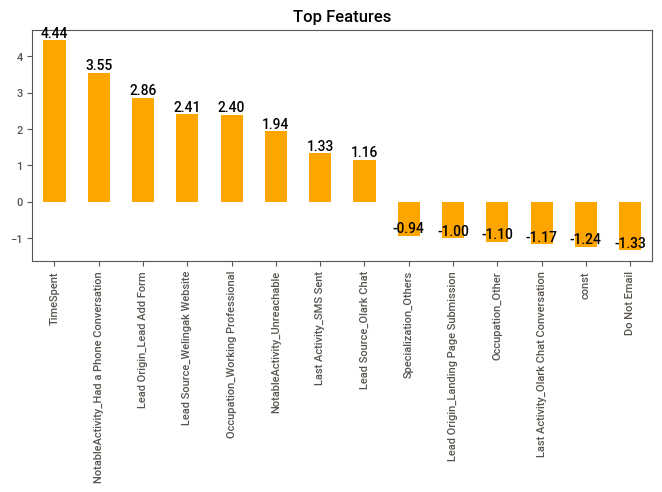

In [162]:

plt.figure(figsize=(8, 3), dpi=100)
ax = parameters.plot.bar(title='Top Features', width=0.5, color='orange')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


## Output:

### Test Data:

    Accuracy    : 81.38%
    Sensitivity : 81.00%
    Specificity : 81.63%
    
### Train Data:

    Accuracy    : 80.76%
    Sensitivity : 80.17%
    Specificity : 81.13%
    
### Note: This model is reflecting very close to each others. This indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
    -Sensitivity of Test set is 81.00% and Train set is 80.17% using cutoff 0.35
    -X Education company set target of lead conversion rate to be around 80% and the model is also giving 81.38% which is meeting the objective
